## Step 1

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [135]:
column_names =['WineType','Alcohol','MalicAcid','Ash','Aclacinity of Ash','Magnesium','Total Phenols','Flavanoids','NonFlavanoids phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
winedata = pd.read_csv("C:/Users/SNIGGDHA/OneDrive/Desktop/ISB/Term 2/Machine Learning/Assignment/wine-data.csv" , header= None ,names=column_names , encoding ='UTF-8')

In [290]:
print(winedata)

     WineType  Alcohol  MalicAcid   Ash  Aclacinity of Ash  Magnesium  \
0           1    14.23       1.71  2.43               15.6        127   
1           1    13.20       1.78  2.14               11.2        100   
2           1    13.16       2.36  2.67               18.6        101   
3           1    14.37       1.95  2.50               16.8        113   
4           1    13.24       2.59  2.87               21.0        118   
..        ...      ...        ...   ...                ...        ...   
173         3    13.71       5.65  2.45               20.5         95   
174         3    13.40       3.91  2.48               23.0        102   
175         3    13.27       4.28  2.26               20.0        120   
176         3    13.17       2.59  2.37               20.0        120   
177         3    14.13       4.10  2.74               24.5         96   

     Total Phenols  Flavanoids  NonFlavanoids phenols  Proanthocyanins  \
0             2.80        3.06                   

## Analysing Dataset with respect to wine type

In [309]:
Winecluster_0_centroid = winedata[(winedata ['WineType'] == 1)].mean()
print('Cluster 0 :\n \n',Winecluster_0_centroid)
Winecluster_1_centroid = winedata[(winedata ['WineType'] == 2)].mean()
print('\n Cluster 1 :\n \n',Winecluster_1_centroid)
Winecluster_2_centroid = winedata[(winedata ['WineType'] == 3)].mean()
print('\n Cluster 2 :\n \n',Winecluster_2_centroid)

Cluster 0 :
 
 WineType                           1.000000
Alcohol                           13.744746
MalicAcid                          2.010678
Ash                                2.455593
Aclacinity of Ash                 17.037288
Magnesium                        106.338983
Total Phenols                      2.840169
Flavanoids                         2.982373
NonFlavanoids phenols              0.290000
Proanthocyanins                    1.899322
Color intensity                    5.528305
Hue                                1.062034
OD280/OD315 of diluted wines       3.157797
Proline                         1115.711864
dtype: float64

 Cluster 1 :
 
 WineType                          2.000000
Alcohol                          12.278732
MalicAcid                         1.932676
Ash                               2.244789
Aclacinity of Ash                20.238028
Magnesium                        94.549296
Total Phenols                     2.258873
Flavanoids                        2.

Cluster 0: Rich and Flavorful:-

WineType: 1.0:
This cluster may represent wines with rich and intense flavors, characterized by higher alcohol content, higher phenolic compounds (such as total phenols and flavonoids), and a higher concentration of proline. The higher OD280/OD315 ratio suggests a more intense and full-bodied flavor profile.

Cluster 1: Balanced and Moderate Flavor:-

WineType: 2.0
This cluster may represent wines with a balanced and moderate flavor profile. They have moderate levels of key chemical components, indicating a well-rounded composition that strikes a balance between different flavor elements.

Cluster 2: Bold and Robust Flavours:-

WineType: 3.0
This cluster may represent wines with bold and robust flavors. They have lower levels of key chemical components compared to the other clusters, suggesting a more intense acidity (indicated by higher MalicAcid) and potentially deeper color intensity, which are often associated with robust and pronounced flavors.

## Step 2: PCA on the Data

In [291]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

### Normalizing the Data

In [138]:
Wine_Comp_DataSet = winedata.iloc[:,1:]
Wine_Comp_DataSet

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [145]:
from sklearn.preprocessing import normalize #StandardScaler
#scaler = StandardScaler()
winedata_scaled = normalize(Wine_Comp_DataSet) #scaler.fit_transform(Wine_Comp_DataSet)
winedata_scaled_df = pd.DataFrame(winedata_scaled,columns=[cols for cols in column_names if cols != ('WineType')])
winedata_scaled_df

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.018364,0.007568,0.003282,0.027460,0.127252,0.002250,0.000817,0.000697,0.001420,0.010314,0.000857,0.002331,0.991225
174,0.017691,0.005162,0.003274,0.030366,0.134666,0.002376,0.000990,0.000568,0.001862,0.009638,0.000924,0.002060,0.990194
175,0.015723,0.005071,0.002678,0.023697,0.142180,0.001884,0.000818,0.000509,0.001600,0.012085,0.000699,0.001848,0.989336
176,0.015514,0.003051,0.002792,0.023559,0.141355,0.001944,0.000801,0.000624,0.001720,0.010955,0.000707,0.001908,0.989482


In [302]:
pca = PCA(n_components=2)
pca_wine=pca.fit_transform(winedata_scaled_df)
pca_wine.shape

explained_variance_ratio = pca.explained_variance_ratio_

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

Principal Component 1: 0.9773
Principal Component 2: 0.0134


The output of pca_wine = PCA(n_components=2).fit_transform(winedata_scaled_df) is a transformed normalized wine dataset that has been reduced to two principal components using Principal Component Analysis (PCA). The resulting pca_wine variable represents the original dataset projected onto a new two-dimensional space, where each sample is represented by two principal component values. 

PC1: PC1 explains the majority of the variance (97.73%) in the dataset. It represents the primary source of variation and can be considered as a measure of overall wine quality or characteristics. The weights (loadings) of the original features in PC1 indicate their contributions to this component. Features with higher absolute weights in PC1 have a stronger influence on differentiating wine samples along this component

PC2: PC2 explains a relatively small amount of the variance (1.34%) in the dataset. It represents a secondary pattern or variation in the wine samples that is not captured by PC1. Similar to PC1, the weights of the original features in PC2 can provide insights into the specific characteristics or attributes that contribute to this component. Features with higher absolute weights in PC2 have a stronger influence on differentiating wine samples along this component.
To understand which original features have the most significant impact on PC1 and PC2, By we need to analyse the weights of different variables in the dataset.


In [294]:
import pandas as pd

pca_df = pd.DataFrame(pca_wine, columns=['PC1', 'PC2'])

pca_df['WineType'] = winedata['WineType']

pca_df
#print(pca_df)

          PC1       PC2  WineType
0   -0.037425  0.008566         1
1   -0.061292  0.006263         1
2   -0.069781 -0.000652         1
3   -0.079461  0.001433         1
4    0.005421  0.005151         1
..        ...       ...       ...
173 -0.024926 -0.003294         3
174 -0.017195 -0.003465         3
175 -0.011702  0.004963         3
176 -0.012636  0.005245         3
177  0.020230 -0.008875         3

[178 rows x 3 columns]


In [148]:
pca_df['WineType'].value_counts()

2    71
1    59
3    48
Name: WineType, dtype: int64

In [149]:
winedata['WineType'].value_counts()


2    71
1    59
3    48
Name: WineType, dtype: int64

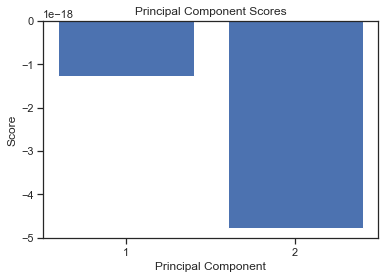

In [150]:
import matplotlib.pyplot as plt

# Extract the principal component scores
component_scores = pca_df.iloc[:, 0:2].mean().values

# Create a bar plot for the principal component scores
plt.bar(range(1, len(component_scores) + 1), component_scores)
plt.xlabel('Principal Component')
plt.ylabel('Score')
plt.title('Principal Component Scores')
plt.xticks(range(1, len(component_scores) + 1))
plt.show()

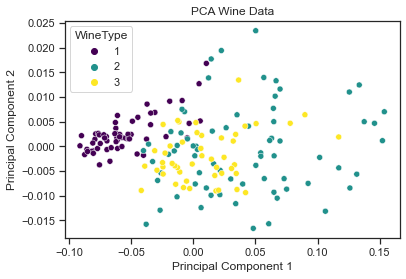

In [151]:
import seaborn as sns

sns.set(style="ticks")

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='WineType', palette='viridis')

plt.title('PCA Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()



In [158]:
loadings1 = pca.components_[0]
loadings2 = pca.components_[1]
loadings_df1 = pd.DataFrame(loadings1, index=winedata_scaled_df.columns, columns=['PC1 Loadings'])#Wine_Comp_DataSet
significant_features1 = loadings_df1.abs().sort_values(by='PC1 Loadings', ascending=False)
loadings_df2 = pd.DataFrame(loadings2, index=winedata_scaled_df.columns, columns=['PC2 Loadings'])#Wine_Comp_DataSet
significant_features2 = loadings_df2.abs().sort_values(by='PC2 Loadings', ascending=False)

significant_features = pd.concat([significant_features1, significant_features2], axis=1)
print(significant_features)

                              PC1 Loadings  PC2 Loadings
Magnesium                         0.947519      0.260495
Aclacinity of Ash                 0.233458      0.912659
Proline                           0.173131      0.037152
Alcohol                           0.119674      0.258199
OD280/OD315 of diluted wines      0.025794      0.050489
MalicAcid                         0.024934      0.112805
Color intensity                   0.024025      0.098696
Ash                               0.022872      0.064166
Total Phenols                     0.020069      0.029461
Flavanoids                        0.017301      0.015707
Proanthocyanins                   0.014383      0.021773
Hue                               0.009841      0.008528
NonFlavanoids phenols             0.003976      0.018834


PC1 Significant Features (highest absolute loadings):
Magnesium (0.947519), Aclacinity of Ash (0.233458), Proline (0.173131), Alcohol (0.119674) and OD280/OD315 of diluted wines (0.025794) 

PC2 Significant Features (highest absolute loadings):
Aclacinity of Ash (0.912659), Magnesium (0.260495),Alcohol (0.258199), MalicAcid (0.112805) and Color intensity (0.098696) .
These significant features indicate the variables that have the highest influence on each principal component. 

In the case of PC1, features such as Magnesium, Aclacinity of Ash, Proline, Alcohol, and OD280/OD315 of diluted wines contribute the most to the variability captured by PC1. Similarly, PC2 is primarily influenced by features like Aclacinity of Ash, Magnesium, Alcohol, MalicAcid, and Color intensity.


## Step 3

### i) Cluster Analysis using KMeans on all chemical measurements

In [229]:
Wine_Cluster_DataSet = winedata.iloc[:,1:]
Wine_Cluster_DataSet

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [230]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Wine_Cluster_Data = scaler.fit_transform(Wine_Cluster_DataSet)
Wine_Cluster_Data_stan = pd.DataFrame(Wine_Cluster_Data,columns = Wine_Cluster_DataSet.columns )
Wine_Cluster_Data_stan

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [231]:
distortions =[]
K = range(1,10)
for k in K:
    KMeanModel = KMeans(n_clusters = k)
    KMeanModel.fit(Wine_Cluster_Data_stan)
    distortions.append(KMeanModel.inertia_)

C:\ProgramData\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


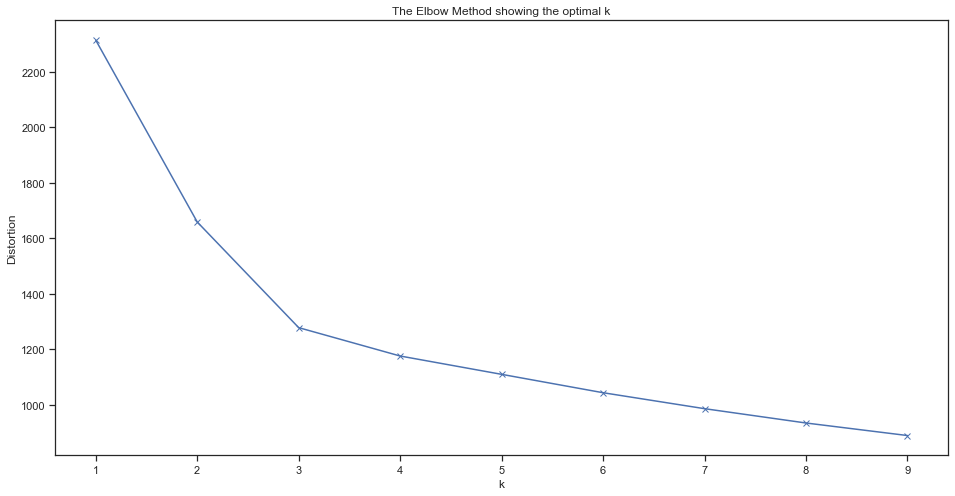

In [232]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [284]:
kmeansModel = KMeans(n_clusters=3)
scatterplot_model = kmeansModel.fit_transform(Wine_Cluster_Data_stan)
kmeansPredict= kmeansModel.predict(Wine_Cluster_Data_stan)


In [285]:
kmeansModel.labels_ 
clust_label=pd.Series(kmeansModel.labels_) 
Wine_Cluster_DataSet['clust']=clust_label 
#Wine_Cluster_Data_stan['clust']=clust_label 
Wine_Cluster_DataSet
#Wine_Cluster_Data_stan

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [235]:
Wine_Cluster_DataSet['clust'].value_counts()

0    65
2    62
1    51
Name: clust, dtype: int64

In [236]:
winedata['WineType'].value_counts()

2    71
1    59
3    48
Name: WineType, dtype: int64

In [237]:
kmeanscluster_0 = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 0)]
kmeanscluster_1 = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 1)]
kmeanscluster_2 = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 2)]


## Cluster 0:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

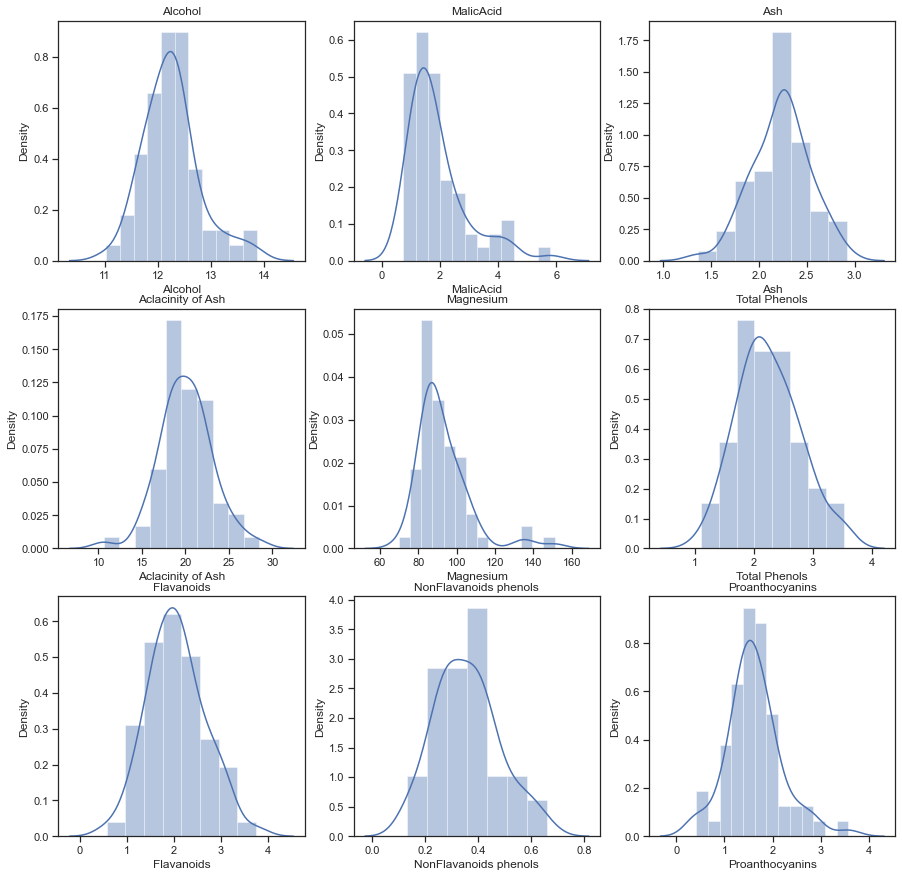

In [238]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeanscluster_0.columns):
  sns.distplot(kmeanscluster_0[col], ax = ax)
  ax.set_title(col)

In [239]:
kmeanscluster_0_centroid = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 0)].mean()
print('Cluster 0 :\n \n',kmeanscluster_0_centroid)

Cluster 0 :
 
 Alcohol                          12.250923
MalicAcid                         1.897385
Ash                               2.231231
Aclacinity of Ash                20.063077
Magnesium                        92.738462
Total Phenols                     2.247692
Flavanoids                        2.050000
NonFlavanoids phenols             0.357692
Proanthocyanins                   1.624154
Color intensity                   2.973077
Hue                               1.062708
OD280/OD315 of diluted wines      2.803385
Proline                         510.169231
clust                             0.000000
dtype: float64


Cluster 0 (Balanced and Moderate): This cluster has lower values for Alcohol (12.25) compared to the other clusters, indicating wines with relatively lower alcohol content.Aclacinity of Ash is relatively high (20.06) in this cluster, suggesting wines with higher ash content. Magnesium is lower (92.74) compared to the other clusters.Total Phenols (2.25) and Flavanoids (2.05) have moderate values. Proline is also relatively low (510.17) in this cluster. Other features such as MalicAcid, Ash, NonFlavanoids phenols, Proanthocyanins, Color intensity, Hue, and OD280/OD315 of diluted wines have lower to moderate values,indicating a slightly milder and less intense flavor.The Aclacinity of Ash and Total Phenols values suggest a balanced acidity and a moderate.

## Cluster 1:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

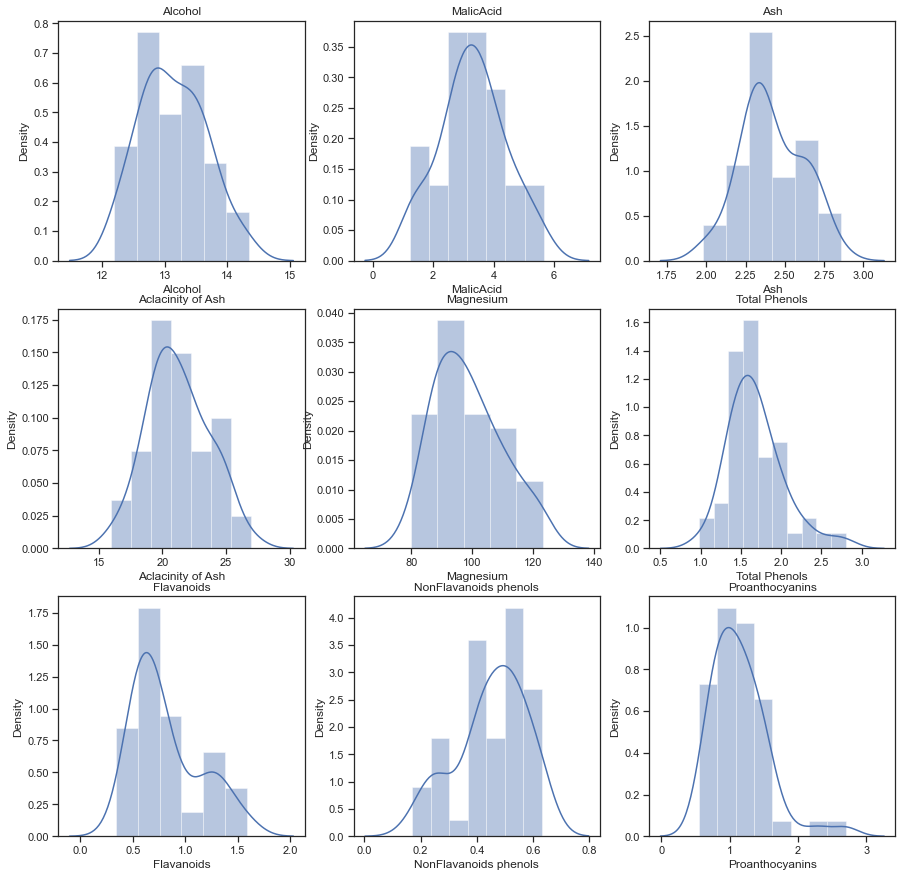

In [240]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeanscluster_1.columns):
  sns.distplot(kmeanscluster_1[col], ax = ax)
  ax.set_title(col)

In [241]:
kmeanscluster_1_centroid = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 1)].mean()
print('Cluster 1 :\n \n',kmeanscluster_1_centroid)

Cluster 1 :
 
 Alcohol                          13.134118
MalicAcid                         3.307255
Ash                               2.417647
Aclacinity of Ash                21.241176
Magnesium                        98.666667
Total Phenols                     1.683922
Flavanoids                        0.818824
NonFlavanoids phenols             0.451961
Proanthocyanins                   1.145882
Color intensity                   7.234706
Hue                               0.691961
OD280/OD315 of diluted wines      1.696667
Proline                         619.058824
clust                             1.000000
dtype: float64


Cluster 1 (Bold and Intense): This cluster has lower values for Alcohol (13.13) compared to the other clusters, indicating wines with lower alcohol content.It shows higher levels of Aclacinity of Ash (21.24), suggesting wines with higher ash content.Magnesium is relatively lower (98.67) in this cluster compared to others.Total Phenols (1.68) and Flavanoids (0.82) have lower values,  suggesting a slightly less pronounced aromatic profile.Proline is also relatively low (619.06) in this cluster,indicating a moderate level of richness in the wine.Other features such as MalicAcid, Ash, NonFlavanoids phenols, Proanthocyanins, Color intensity, Hue, and OD280/OD315 of diluted wines have moderate values.

## Cluster 2:

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

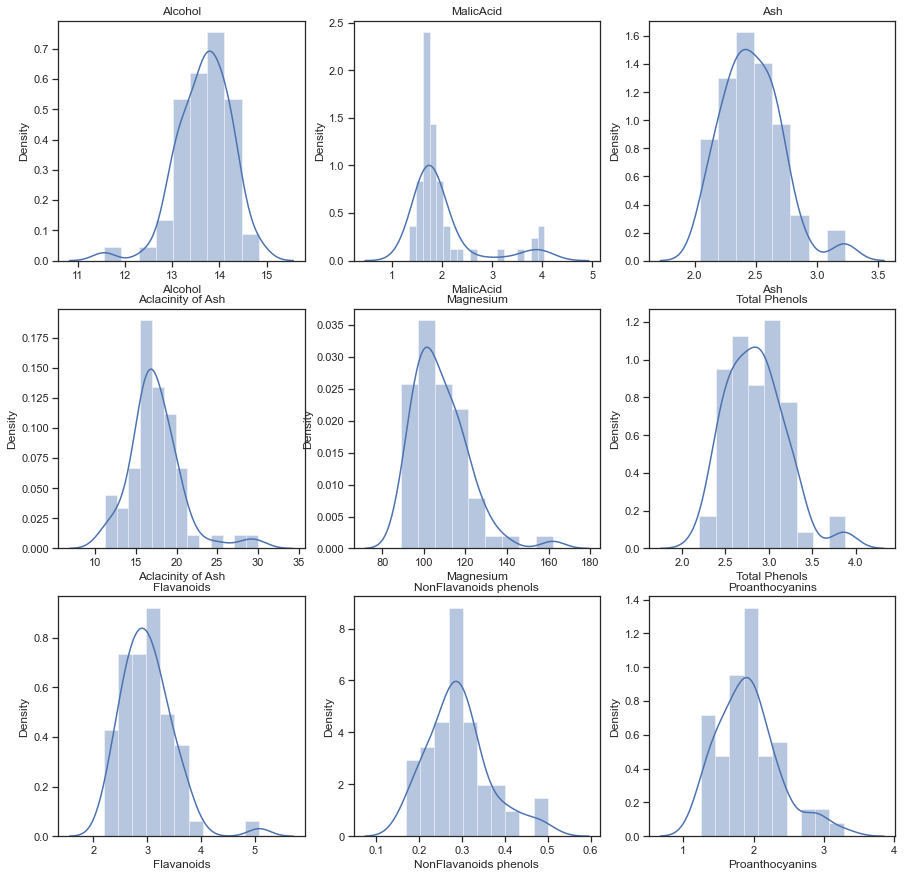

In [242]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, kmeanscluster_2.columns):
  sns.distplot(kmeanscluster_2[col], ax = ax)
  ax.set_title(col)

In [243]:
kmeanscluster_2_centroid = Wine_Cluster_DataSet[(Wine_Cluster_DataSet ['clust'] == 2)].mean()
print('Cluster 2 :\n \n',kmeanscluster_2_centroid)

Cluster 2 :
 
 Alcohol                           13.676774
MalicAcid                          1.997903
Ash                                2.466290
Aclacinity of Ash                 17.462903
Magnesium                        107.967742
Total Phenols                      2.847581
Flavanoids                         3.003226
NonFlavanoids phenols              0.292097
Proanthocyanins                    1.922097
Color intensity                    5.453548
Hue                                1.065484
OD280/OD315 of diluted wines       3.163387
Proline                         1100.225806
clust                              2.000000
dtype: float64


Cluster 2 (Rich Flavors) : This cluster has a relatively higher value for Alcohol (13.68) compared to the other clusters, indicating wines with higher alcohol content.It also has a moderate level of Aclacinity of Ash (17.46) and Magnesium (107.97).The cluster shows higher values for Total Phenols (2.85) and Flavanoids (3.00), suggesting wines with higher phenolic compounds.Proline, a measure of wine quality and intensity, is relatively high in this cluster (1100.23).Other features such as MalicAcid, Ash, NonFlavanoids phenols, Color intensity, Hue, and OD280/OD315 of diluted wines have intermediate values.Overall,these wines exhibit rich flavors and intense aromas and represents a robust and full-bodied profile.

In [305]:
Wine_Cluster_DataSet['clust'] = Wine_Cluster_DataSet['clust'].replace(0, 'Balanced and Moderate Flavors')
Wine_Cluster_DataSet['clust'] = Wine_Cluster_DataSet['clust'].replace(1, 'Bold and Intense Flavors')
Wine_Cluster_DataSet['clust'] = Wine_Cluster_DataSet['clust'].replace(2, 'Rich Flavors')
Wine_Cluster_DataSet

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Bold and Intense Flavors
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Bold and Intense Flavors
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Bold and Intense Flavors
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Bold and Intense Flavors
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Bold and Intense Flavors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Rich Flavors
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Rich Flavors
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Rich Flavors
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Rich Flavors


In [306]:

Wine_Cluster_DataSet.to_csv("C:/Users/SNIGGDHA/OneDrive/Desktop/ISB/Term 2/Machine Learning/Assignment/Snigdha_Bhattacharjee_12220067__Kmean.csv",encoding="utf-8")

### ii) Cluster Analysis using  KMeans on PCA.

In [316]:
pca3 = PCA(n_components=2)
pca_wine_stan = pca3.fit_transform(Wine_Cluster_Data_stan)

**Applying K-means to the 2 Principal Components and applying transformation**

In [317]:
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(pca_wine_stan)
cluster_labels = model.labels_

df_pca_clusters = pd.DataFrame(pca_wine_stan, columns=['PC1', 'PC2'])
df_pca_clusters['clust'] = cluster_labels
df_pca_clusters
print(df_pca_clusters)


          PC1       PC2  clust
0    3.316751 -1.443463      2
1    2.209465  0.333393      2
2    2.516740 -1.031151      2
3    3.757066 -2.756372      2
4    1.008908 -0.869831      2
..        ...       ...    ...
173 -3.370524 -2.216289      1
174 -2.601956 -1.757229      1
175 -2.677839 -2.760899      1
176 -2.387017 -2.297347      1
177 -3.208758 -2.768920      1

[178 rows x 3 columns]


In [318]:
WineData_PCA_Clustering= pd.concat([winedata.iloc[:,1:], df_pca_clusters[['PC1', 'PC2', 'clust']]], axis=1)
WineData_PCA_Clustering

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,PC1,PC2,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.316751,-1.443463,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.209465,0.333393,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.516740,-1.031151,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.757066,-2.756372,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,-0.869831,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-3.370524,-2.216289,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,-2.601956,-1.757229,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,-2.677839,-2.760899,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-2.387017,-2.297347,1


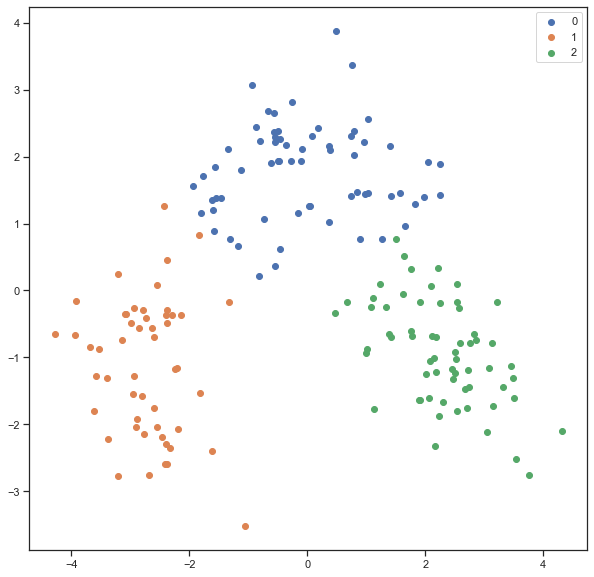

In [319]:
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(Wine_Cluster_Data_stan)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(pca_wine_stan[label == i , 0] , pca_wine_stan[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()


In [320]:
PCAcluster_0_centroid = WineData_PCA_Clustering[(WineData_PCA_Clustering ['clust'] == 0)].mean()
print('Cluster 0 :\n \n',PCAcluster_0_centroid)
PCAcluster_1_centroid = WineData_PCA_Clustering[(WineData_PCA_Clustering ['clust'] == 1)].mean()
print('\n Cluster 1 :\n \n',PCAcluster_1_centroid)
PCAcluster_2_centroid = WineData_PCA_Clustering[(WineData_PCA_Clustering ['clust'] == 2)].mean()
print('\n Cluster 2 :\n \n',PCAcluster_2_centroid)

Cluster 0 :
 
 Alcohol                          12.238308
MalicAcid                         1.931385
Ash                               2.219385
Aclacinity of Ash                19.898462
Magnesium                        92.830769
Total Phenols                     2.204308
Flavanoids                        1.989231
NonFlavanoids phenols             0.365538
Proanthocyanins                   1.587692
Color intensity                   2.992615
Hue                               1.051631
OD280/OD315 of diluted wines      2.769231
Proline                         506.353846
PC1                              -0.162785
PC2                               1.767588
clust                             0.000000
dtype: float64

 Cluster 1 :
 
 Alcohol                          13.151633
MalicAcid                         3.344490
Ash                               2.434694
Aclacinity of Ash                21.438776
Magnesium                        99.020408
Total Phenols                     1.678163
Flavano

Cluster 0 (Balanced and Moderate): This cluster has lower values for Alcohol (12.24) compared to the other clusters, indicating wines with relatively lower alcohol content.Aclacinity of Ash is relatively high (19.9) in this cluster, suggesting wines with higher ash content. Magnesium is lower (92.83) compared to the other clusters.Total Phenols (2.20) and Flavanoids (2.0) have moderate values. Proline is also relatively low (506.35) in this cluster. Other features such as MalicAcid, Ash, NonFlavanoids phenols, Proanthocyanins, Color intensity, Hue, and OD280/OD315 of diluted wines have lower to moderate values,indicating a slightly milder and less intense flavor.The Aclacinity of Ash and Total Phenols values suggest a balanced acidity and a moderate.

Cluster 1 (Bold and Intense): This cluster has lower values for Alcohol (13.15) compared to the other clusters, indicating wines with lower alcohol content.It shows higher levels of Aclacinity of Ash (21.43), suggesting wines with higher ash content.Magnesium is relatively lower (99.02) in this cluster compared to others.Total Phenols (1.68) and Flavanoids (0.8) have lower values,  suggesting a slightly less pronounced aromatic profile.Proline is also relatively low (627.6) in this cluster,indicating a moderate level of richness in the wine.Other features such as MalicAcid, Ash, NonFlavanoids phenols, Proanthocyanins, Color intensity, Hue, and OD280/OD315 of diluted wines have moderate values.

Cluster 2 (Rich Flavors) : This cluster has a relatively higher value for Alcohol (13.65) compared to the other clusters, indicating wines with higher alcohol content.It also has a moderate level of Aclacinity of Ash (17.6) and Magnesium (107.31).The cluster shows higher values for Total Phenols (2.85) and Flavanoids (3.01), suggesting wines with higher phenolic compounds.Proline, a measure of wine quality and intensity, is relatively high in this cluster (1082.23).Other features such as MalicAcid, Ash, NonFlavanoids phenols, Color intensity, Hue, and OD280/OD315 of diluted wines have intermediate values.Overall,these wines exhibit rich flavors and intense aromas and represents a robust and full-bodied profile.

In [307]:
WineData_PCA_Clustering['clust'] = WineData_PCA_Clustering['clust'].replace(0, 'Bold and Intense Flavors')
WineData_PCA_Clustering['clust'] = WineData_PCA_Clustering['clust'].replace(1, 'Rich Flavors')
WineData_PCA_Clustering['clust'] = WineData_PCA_Clustering['clust'].replace(2, 'Balanced and Moderate Flavors')
WineData_PCA_Clustering

,Alcohol,MalicAcid,Ash,Aclacinity of Ash,Magnesium,Total Phenols,Flavanoids,NonFlavanoids phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,PC1,PC2,clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.316751,-1.443463,Rich Flavors
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.209465,0.333393,Rich Flavors
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.516740,-1.031151,Rich Flavors
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.757066,-2.756372,Rich Flavors
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,-0.869831,Rich Flavors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-3.370524,-2.216289,Bold and Intense
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,-2.601956,-1.757229,Bold and Intense
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,-2.677839,-2.760899,Bold and Intense
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-2.387017,-2.297347,Bold and Intense


In [308]:

WineData_PCA_Clustering.to_csv("C:/Users/SNIGGDHA/OneDrive/Desktop/ISB/Term 2/Machine Learning/Assignment/Snigdha_Bhattacharjee_12220067_PCA.csv",encoding="utf-8")